In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as AUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,StandardScaler
from sklearn.model_selection import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

#  This may raise an exception in earlier versions of Jupyter
%config InlineBackend.figure_format = 'retina'

In [2]:
# 此时为什么data前面不能有点 “.”呢?

train = pd.read_csv('data/csv/Homesite_Quote_Conversion/train.csv')


In [3]:
test = pd.read_csv('data/csv/Homesite_Quote_Conversion/test.csv')

# 先来看看数据吧

In [4]:
train.shape

(260753, 299)

In [5]:
test.shape

(173836, 298)

In [6]:
print('train columns:',list(train.columns[:299]))

train columns: ['QuoteNumber', 'Original_Quote_Date', 'QuoteConversion_Flag', 'Field6', 'Field7', 'Field8', 'Field9', 'Field10', 'Field11', 'Field12', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8', 'CoverageField9', 'CoverageField11A', 'CoverageField11B', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6', 'SalesField7', 'SalesField8', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13', 'SalesField14', 'SalesField15', 'PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B', 'PersonalField5', 'PersonalField6', 'PersonalField7', 'PersonalField8', 'PersonalField9', 'PersonalField10A', 'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 

In [7]:
train.describe()

,QuoteNumber,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
count,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,...,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000,260753.000000
mean,217201.246011,0.187511,18.293339,0.938346,0.001451,1.162718,9.012533,13.000403,9.054005,13.015240,...,11.567756,12.985695,11.694903,13.049882,-0.350481,12.994362,-0.343601,13.042734,-0.341009,14.122948
std,125478.522633,0.390322,7.382803,0.037086,0.001486,0.116833,5.576509,7.219264,5.560521,7.211717,...,5.448425,7.216091,5.626092,7.213636,4.057792,7.219943,4.078673,7.145248,4.086511,5.829091
min,1.000000,0.000000,1.000000,0.874600,0.000400,1.000000,-1.000000,-1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,108517.000000,0.000000,11.000000,0.915300,0.000600,1.020000,5.000000,7.000000,5.000000,7.000000,...,8.000000,7.000000,7.000000,7.000000,-1.000000,7.000000,-1.000000,7.000000,-1.000000,8.000000
50%,217012.000000,0.000000,23.000000,0.940300,0.000600,1.188600,8.000000,13.000000,8.000000,13.000000,...,11.000000,13.000000,11.000000,13.000000,-1.000000,13.000000,-1.000000,13.000000,-1.000000,13.000000
75%,325905.000000,0.000000,24.000000,0.968500,0.003800,1.266500,12.000000,19.000000,12.000000,19.000000,...,15.000000,19.000000,15.000000,19.000000,-1.000000,19.000000,-1.000000,19.000000,-1.000000,19.000000
max,434588.000000,1.000000,28.000000,1.010100,0.004000,1.304500,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(265), object(28)
memory usage: 594.8+ MB


# 原始数据集

In [9]:
train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


# 将QuoteNumber一列提取出来，也保存为Number_train.csv,将源文件中的该列删除

In [3]:
#  这步操作是对的执行先后的问题

Number_train = train['QuoteNumber']
Number_train.head()

0    1
1    2
2    4
3    6
4    8
Name: QuoteNumber, dtype: int64

In [42]:
# header=True  保存索引时，一定要指明header为True,要不然会默认从1开始，而不是原文件中的属性名
Number_train.to_csv('./data/csv/Homesite_Quote_Conversion/Number_train.csv',header=True)

In [4]:
Number_train = pd.read_csv('./data/csv/Homesite_Quote_Conversion/Number_train.csv')
Number_train.head()

,QuoteNumber
0,1
1,2
2,4
3,6
4,8


In [45]:
# dropna(): 函数去掉
train= train.drop('QuoteNumber',axis = 1)

In [53]:
train.head()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,0,23,0.9403,0.0006,1.0200,17,23,17,23,15,...,14,18,9,9,-1,8,-1,18,-1,10
1,0,7,1.0006,0.0040,1.2433,6,8,6,8,5,...,8,7,10,10,-1,11,-1,17,-1,20
2,0,7,1.0006,0.0040,1.2433,7,12,7,12,6,...,12,15,15,18,-1,21,-1,11,-1,8
3,0,10,0.9769,0.0004,1.2665,3,2,3,2,2,...,14,18,6,5,-1,10,-1,9,-1,21
4,0,23,0.9472,0.0006,1.3045,8,13,8,13,7,...,10,10,18,22,-1,10,-1,11,-1,12


In [13]:
# 查看数据类型
train.dtypes

QuoteConversion_Flag      int64
Field6                   object
Field7                    int64
Field8                  float64
Field9                  float64
Field10                  object
Field11                 float64
Field12                  object
CoverageField1A           int64
CoverageField1B           int64
CoverageField2A           int64
CoverageField2B           int64
CoverageField3A           int64
CoverageField3B           int64
CoverageField4A           int64
CoverageField4B           int64
CoverageField5A           int64
CoverageField5B           int64
CoverageField6A           int64
CoverageField6B           int64
CoverageField8           object
CoverageField9           object
CoverageField11A          int64
CoverageField11B          int64
SalesField1A              int64
SalesField1B              int64
SalesField2A              int64
SalesField2B              int64
SalesField3               int64
SalesField4               int64
                         ...   
Geograph

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 297 entries, QuoteConversion_Flag to GeographicField64
dtypes: float64(6), int64(264), object(27)
memory usage: 590.8+ MB


# 数据预处理，标准化处理

# 将object类型的数据挑选出来，保存为另一个csv文件，并且将原文件中的object类型的数据进行删除操作，将其余的float和int类型的数据进行标准化处理

In [47]:
object_features = list(train.select_dtypes(include = ['object']).columns)
object_train = train[object_features]
# object_train = pd.DataFrame(object_train,index=range(ange(1,260753,1))
object_train.head()

,Original_Quote_Date,Field6,Field10,Field12,CoverageField8,CoverageField9,SalesField7,PersonalField7,PersonalField16,PersonalField17,...,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
0,2013-08-16,B,965,N,T,D,V,N,ZA,ZE,...,N,N,Y,G,Y,N,N,N,N,CA
1,2014-04-22,F,548,N,T,E,P,N,XB,YJ,...,N,O,N,H,Y,N,N,N,N,NJ
2,2014-08-25,F,548,N,T,J,K,N,ZH,XS,...,N,K,Y,H,Y,N,N,N,N,NJ
3,2013-04-15,J,"1,165",N,Y,F,V,N,XO,XE,...,N,O,Y,G,N,N,Y,N,N,TX
4,2014-01-25,E,"1,487",N,T,F,R,N,ZA,ZE,...,N,O,N,H,N,N,N,N,N,IL


In [48]:
# 保存文件
object_train.to_csv('./data/csv/Homesite_Quote_Conversion/object_train.csv')

In [49]:
train = train.drop(object_features,axis = 1)

In [50]:
train.head()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,0,23,0.9403,0.0006,1.0200,17,23,17,23,15,...,14,18,9,9,-1,8,-1,18,-1,10
1,0,7,1.0006,0.0040,1.2433,6,8,6,8,5,...,8,7,10,10,-1,11,-1,17,-1,20
2,0,7,1.0006,0.0040,1.2433,7,12,7,12,6,...,12,15,15,18,-1,21,-1,11,-1,8
3,0,10,0.9769,0.0004,1.2665,3,2,3,2,2,...,14,18,6,5,-1,10,-1,9,-1,21
4,0,23,0.9472,0.0006,1.3045,8,13,8,13,7,...,10,10,18,22,-1,10,-1,11,-1,12


In [54]:
print('train columns:',list(train.columns))

train columns: ['QuoteConversion_Flag', 'Field7', 'Field8', 'Field9', 'Field11', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField11A', 'CoverageField11B', 'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6', 'SalesField8', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13', 'SalesField14', 'SalesField15', 'PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B', 'PersonalField5', 'PersonalField6', 'PersonalField8', 'PersonalField9', 'PersonalField10A', 'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 'PersonalField15', 'PersonalField22', 'PersonalField23', 'PersonalField24', 'PersonalField25', 'PersonalField26', 'PersonalField27', 'Perso

In [58]:
# 取出，想要查看的特征值对目标值的影响的列名，作为一个数组

feature = ['QuoteConversion_Flag', 'Field7', 'Field8', 'Field9', 'Field11',
           'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B',
           'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 
           'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 
           'CoverageField11A', 'CoverageField11B', 'SalesField1A', 'SalesField1B', 'SalesField2A',
           'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6', 'SalesField8', 
           'SalesField9', 'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13', 'SalesField14',
           'SalesField15', 'PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B',
           'PersonalField5', 'PersonalField6', 'PersonalField8', 'PersonalField9', 'PersonalField10A',
           'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 
           'PersonalField15', 'PersonalField22', 'PersonalField23', 'PersonalField24', 'PersonalField25', 
           'PersonalField26', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 
           'PersonalField31', 'PersonalField32', 'PersonalField33', 'PersonalField34', 'PersonalField35', 
           'PersonalField36', 'PersonalField37', 'PersonalField38', 'PersonalField39', 'PersonalField40', 
           'PersonalField41', 'PersonalField42', 'PersonalField43', 'PersonalField44', 'PersonalField45', 
           'PersonalField46', 'PersonalField47', 'PersonalField48', 'PersonalField49', 'PersonalField50', 
           'PersonalField51', 'PersonalField52', 'PersonalField53', 'PersonalField54', 'PersonalField55', 
           'PersonalField56', 'PersonalField57', 'PersonalField58', 'PersonalField59', 'PersonalField60', 
           'PersonalField61', 'PersonalField62', 'PersonalField63', 'PersonalField64', 'PersonalField65', 
           'PersonalField66', 'PersonalField67', 'PersonalField68', 'PersonalField69', 'PersonalField70', 
           'PersonalField71', 'PersonalField72', 'PersonalField73', 'PersonalField74', 'PersonalField75', 
           'PersonalField76', 'PersonalField77', 'PersonalField78', 'PersonalField79', 'PersonalField80', 
           'PersonalField81', 'PersonalField82', 'PersonalField83', 'PersonalField84', 'PropertyField1A', 
           'PropertyField1B', 'PropertyField2A', 'PropertyField2B', 'PropertyField6', 'PropertyField8', 
           'PropertyField9', 'PropertyField10', 'PropertyField11A', 'PropertyField11B', 'PropertyField12', 
           'PropertyField13', 'PropertyField15', 'PropertyField16A', 'PropertyField16B', 'PropertyField17', 
           'PropertyField18', 'PropertyField19', 'PropertyField20', 'PropertyField21A', 'PropertyField21B', 
           'PropertyField22', 'PropertyField23', 'PropertyField24A', 'PropertyField24B', 'PropertyField25', 
           'PropertyField26A', 'PropertyField26B', 'PropertyField27', 'PropertyField29', 'PropertyField35', 
           'PropertyField39A', 'PropertyField39B', 'GeographicField1A', 'GeographicField1B', 'GeographicField2A', 
           'GeographicField2B', 'GeographicField3A', 'GeographicField3B', 'GeographicField4A', 'GeographicField4B', 
           'GeographicField5A', 'GeographicField5B', 'GeographicField6A', 'GeographicField6B', 'GeographicField7A', 
           'GeographicField7B', 'GeographicField8A', 'GeographicField8B', 'GeographicField9A', 'GeographicField9B', 
           'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 
           'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 
           'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 
           'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 
           'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 
           'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A', 'GeographicField24B', 
           'GeographicField25A', 'GeographicField25B', 'GeographicField26A', 'GeographicField26B', 'GeographicField27A', 
           'GeographicField27B', 'GeographicField28A', 'GeographicField28B', 'GeographicField29A', 'GeographicField29B', 
           'GeographicField30A', 'GeographicField30B', 'GeographicField31A', 'GeographicField31B', 'GeographicField32A', 
           'GeographicField32B', 'GeographicField33A', 'GeographicField33B', 'GeographicField34A', 'GeographicField34B', 
           'GeographicField35A', 'GeographicField35B', 'GeographicField36A', 'GeographicField36B', 'GeographicField37A', 
           'GeographicField37B', 'GeographicField38A', 'GeographicField38B', 'GeographicField39A', 'GeographicField39B', 
           'GeographicField40A', 'GeographicField40B', 'GeographicField41A', 'GeographicField41B', 'GeographicField42A', 
           'GeographicField42B', 'GeographicField43A', 'GeographicField43B', 'GeographicField44A', 'GeographicField44B', 
           'GeographicField45A', 'GeographicField45B', 'GeographicField46A', 'GeographicField46B', 'GeographicField47A', 
           'GeographicField47B', 'GeographicField48A', 'GeographicField48B', 'GeographicField49A', 'GeographicField49B', 
           'GeographicField50A', 'GeographicField50B', 'GeographicField51A', 'GeographicField51B', 'GeographicField52A', 
           'GeographicField52B', 'GeographicField53A', 'GeographicField53B', 'GeographicField54A', 'GeographicField54B', 
           'GeographicField55A', 'GeographicField55B', 'GeographicField56A', 'GeographicField56B', 'GeographicField57A', 
           'GeographicField57B', 'GeographicField58A', 'GeographicField58B', 'GeographicField59A', 'GeographicField59B', 
           'GeographicField60A', 'GeographicField60B', 'GeographicField61A', 'GeographicField61B', 'GeographicField62A',
           'GeographicField62B']

# 取出数据中的特征值列
train = train[feature]

# 找到列名，转化为列表
col = list(train.columns)


# 把所有列的类型都转化为数值型，出错的地方填入NaN，再把NaN的地方补0
train[col] = train[col].apply(pd.to_numeric,errors='coerce').fillna(0.0)
# 至此，object的列（列中存储的是string类型）转成了float
 
# 最后一步，把所有列都转化成float类型，done！
train = pd.DataFrame(train,dtype='float')




#dc_listings['Smokeyear'] = dc_listings.Smokeyear.str.replace('\?','0.0').astype(float)
#AttributeError: Can only use .str accessor with string values, which use 
                                      #  np.object_ dtype in pandas

# dropna(): 函数去掉缺失值
train = train.dropna()

# 转换为标准化数据
train[feature] = StandardScaler().fit_transform(train[feature])
# normalized_listings = dc_listings
print(train.shape)
# normalized_listings.head()

train.head()


(260753, 270)


,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,1.065806,...,0.446413,0.694880,-0.479002,-0.561422,-0.160067,-0.691747,-0.160935,0.693786,-0.16126,-0.707307
1,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,-0.726413,...,-0.654825,-0.829494,-0.301258,-0.422795,-0.160067,-0.276230,-0.160935,0.553833,-0.16126,1.008230
2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,-0.547191,...,0.079334,0.279141,0.587460,0.686218,-0.160067,1.108825,-0.160935,-0.285888,-0.16126,-1.050414
3,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,-1.264079,...,0.446413,0.694880,-1.012233,-1.115928,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,1.179783
4,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,-0.367969,...,-0.287745,-0.413756,1.120691,1.240725,-0.160067,-0.414736,-0.160935,-0.285888,-0.16126,-0.364199


# 将处理过的数据保存到本地

In [59]:
train.to_csv('data/csv/Homesite_Quote_Conversion/train_last.csv')

In [60]:
train1 = pd.read_csv('data/csv/Homesite_Quote_Conversion/train_last.csv')
train1.head()

,Unnamed: 0,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,0,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,...,0.446413,0.694880,-0.479002,-0.561422,-0.160067,-0.691747,-0.160935,0.693786,-0.16126,-0.707307
1,1,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,...,-0.654825,-0.829494,-0.301258,-0.422795,-0.160067,-0.276230,-0.160935,0.553833,-0.16126,1.008230
2,2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,...,0.079334,0.279141,0.587460,0.686218,-0.160067,1.108825,-0.160935,-0.285888,-0.16126,-1.050414
3,3,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,...,0.446413,0.694880,-1.012233,-1.115928,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,1.179783
4,4,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,...,-0.287745,-0.413756,1.120691,1.240725,-0.160067,-0.414736,-0.160935,-0.285888,-0.16126,-0.364199


# dropna(): 函数去掉缺失值

In [61]:

train1 = train1.dropna()
train1.head()

,Unnamed: 0,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,0,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,...,0.446413,0.694880,-0.479002,-0.561422,-0.160067,-0.691747,-0.160935,0.693786,-0.16126,-0.707307
1,1,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,...,-0.654825,-0.829494,-0.301258,-0.422795,-0.160067,-0.276230,-0.160935,0.553833,-0.16126,1.008230
2,2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,...,0.079334,0.279141,0.587460,0.686218,-0.160067,1.108825,-0.160935,-0.285888,-0.16126,-1.050414
3,3,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,...,0.446413,0.694880,-1.012233,-1.115928,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,1.179783
4,4,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,...,-0.287745,-0.413756,1.120691,1.240725,-0.160067,-0.414736,-0.160935,-0.285888,-0.16126,-0.364199


# 删除为零的属性列

In [62]:
train_last = train1.ix[:,~((train1 == -1).all()|(train1 == 0).all())]
train_last.head()

d:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Unnamed: 0,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,0,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,...,0.446413,0.694880,-0.479002,-0.561422,-0.160067,-0.691747,-0.160935,0.693786,-0.16126,-0.707307
1,1,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,...,-0.654825,-0.829494,-0.301258,-0.422795,-0.160067,-0.276230,-0.160935,0.553833,-0.16126,1.008230
2,2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,...,0.079334,0.279141,0.587460,0.686218,-0.160067,1.108825,-0.160935,-0.285888,-0.16126,-1.050414
3,3,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,...,0.446413,0.694880,-1.012233,-1.115928,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,1.179783
4,4,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,...,-0.287745,-0.413756,1.120691,1.240725,-0.160067,-0.414736,-0.160935,-0.285888,-0.16126,-0.364199


In [63]:
train_last.to_csv('data/csv/Homesite_Quote_Conversion/train_short.csv')

# pd.read_csv()||pd.to_csv()索引问题index
# to_csv()存储时不加索引
df.to_csv(path, index= False, header= False)



# read_csv()读取时声明第一列是索引,第一行是索引
df = pd.read_csv(path, index_col= 0, header= 0)
header = 0 # 源文件第一行作为读取后的列索引
header = None # 源文件没有列索引，自动为其添加
index_col = None # 源文件没有行索引，自动为其添加，把原来其自己的行索引视为新的一列
index_col = 0  # 指定源文件第一列作为行索引
# https://blog.csdn.net/The_Time_Runner/article/details/88353161

# https://blog.csdn.net/weixin_44208569/article/details/89676843
# 将三个csv文件进行合并，train_short.csv,Number_train.csv和object_train.csv

In [5]:
# 先查看一下三个文件的数据
Number_train = pd.read_csv('data/csv/Homesite_Quote_Conversion/Number_train.csv')
Number_train.head()

,QuoteNumber
0,1
1,2
2,4
3,6
4,8


In [33]:
train_short = pd.read_csv('data/csv/Homesite_Quote_Conversion/train_short.csv')
train_short.head()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B
0,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,1.065806,...,0.446413,0.694880,-0.479002,-0.561422,-0.160067,-0.691747,-0.160935,0.693786,-0.16126,-0.707307
1,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,-0.726413,...,-0.654825,-0.829494,-0.301258,-0.422795,-0.160067,-0.276230,-0.160935,0.553833,-0.16126,1.008230
2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,-0.547191,...,0.079334,0.279141,0.587460,0.686218,-0.160067,1.108825,-0.160935,-0.285888,-0.16126,-1.050414
3,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,-1.264079,...,0.446413,0.694880,-1.012233,-1.115928,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,1.179783
4,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,-0.367969,...,-0.287745,-0.413756,1.120691,1.240725,-0.160067,-0.414736,-0.160935,-0.285888,-0.16126,-0.364199


In [21]:
# train_short.loc['Row_mean'] = train_short.apply(lambda x: x.mean())

# 对每一行取平均值，并且添加到数据集最后一列
# https://www.cnblogs.com/onemorepoint/p/9541788.html

In [34]:
train_short['Col_mean'] = train_short.apply(lambda x: (x.sum()/268), axis=1)

In [35]:
train_short.tail(5)

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,Col_mean
260748,-0.480401,0.637518,0.829276,-0.707077,0.888293,-0.002247,0.276981,-0.009712,0.275214,-0.188748,...,-0.829494,-0.834489,-0.977301,-0.160067,1.247330,-0.160935,0.973693,-0.16126,-1.050414,0.255353
260749,-0.480401,1.043869,-1.384517,-0.707077,0.888293,1.073697,1.246611,1.069325,1.245858,0.707362,...,-0.275177,-1.189976,-1.254555,6.247370,1.662847,-0.160935,-1.545468,-0.16126,1.008230,0.221923
260750,-0.480401,-0.987884,0.813098,1.715917,0.221529,-0.540219,-0.554130,-0.549231,-0.556767,-0.726413,...,-0.690915,0.765203,0.963471,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,-1.050414,-0.136305
260751,-0.480401,-1.529685,1.678661,1.715917,0.689719,1.253021,1.385130,1.249165,1.384522,2.141137,...,-0.829494,-0.301258,-0.284168,-0.160067,1.385836,-0.160935,-0.425841,-0.16126,0.322015,0.054604
260752,-0.480401,-0.446083,-1.182282,1.581306,-0.819273,-1.257515,-1.523760,-1.268590,-1.527412,-1.264079,...,-1.522392,2.364896,1.656604,-0.160067,0.139286,-0.160935,-1.265562,-0.16126,-1.050414,-0.206567


In [36]:
train_short.head()

,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,...,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,Col_mean
0,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,1.065806,...,0.694880,-0.479002,-0.561422,-0.160067,-0.691747,-0.160935,0.693786,-0.16126,-0.707307,-0.010619
1,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,-0.726413,...,-0.829494,-0.301258,-0.422795,-0.160067,-0.276230,-0.160935,0.553833,-0.16126,1.008230,0.025247
2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,-0.547191,...,0.279141,0.587460,0.686218,-0.160067,1.108825,-0.160935,-0.285888,-0.16126,-1.050414,0.121371
3,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,-1.264079,...,0.694880,-1.012233,-1.115928,-0.160067,-0.414736,-0.160935,-0.565794,-0.16126,1.179783,-0.152565
4,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,-0.367969,...,-0.413756,1.120691,1.240725,-0.160067,-0.414736,-0.160935,-0.285888,-0.16126,-0.364199,0.117368


In [37]:
object_train = pd.read_csv('data/csv/Homesite_Quote_Conversion/object_train.csv')
object_train.head()

,Original_Quote_Date,Field6,Field10,Field12,CoverageField8,CoverageField9,SalesField7,PersonalField7,PersonalField16,PersonalField17,...,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
0,2013/8/16,B,965,N,T,D,V,N,ZA,ZE,...,N,N,Y,G,Y,N,N,N,N,CA
1,2014/4/22,F,548,N,T,E,P,N,XB,YJ,...,N,O,N,H,Y,N,N,N,N,NJ
2,2014/8/25,F,548,N,T,J,K,N,ZH,XS,...,N,K,Y,H,Y,N,N,N,N,NJ
3,2013/4/15,J,"1,165",N,Y,F,V,N,XO,XE,...,N,O,Y,G,N,N,Y,N,N,TX
4,2014/1/25,E,"1,487",N,T,F,R,N,ZA,ZE,...,N,O,N,H,N,N,N,N,N,IL


In [38]:
last_train = pd.concat([Number_train,train_short,object_train],axis=1)
last_train.head()

,QuoteNumber,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
0,1,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,...,N,N,Y,G,Y,N,N,N,N,CA
1,2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,...,N,O,N,H,Y,N,N,N,N,NJ
2,4,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,...,N,K,Y,H,Y,N,N,N,N,NJ
3,6,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,...,N,O,Y,G,N,N,Y,N,N,TX
4,8,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,...,N,O,N,H,N,N,N,N,N,IL


# 查看缺失值     绝大多数情况下我们都要对缺失值进行处理

# 有缺失值

In [39]:
pd.isnull(last_train).values.any()

True

In [40]:
# 利用dropna() 函数删除掉缺失值
last_train = last_train.dropna()
last_train.head()

,QuoteNumber,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
0,1,-0.480401,0.637518,0.052696,-0.572467,-1.221557,1.432345,1.385130,1.429005,1.384522,...,N,N,Y,G,Y,N,N,N,N,CA
1,2,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.540219,-0.692648,-0.549231,-0.695431,...,N,O,N,H,Y,N,N,N,N,NJ
2,4,-0.480401,-1.529685,1.678661,1.715917,0.689719,-0.360895,-0.138574,-0.369391,-0.140777,...,N,K,Y,H,Y,N,N,N,N,NJ
3,6,-0.480401,-1.123334,1.039600,-0.707077,0.888293,-1.078191,-1.523760,-1.088750,-1.527412,...,N,O,Y,G,N,N,Y,N,N,TX
4,8,-0.480401,0.637518,0.238752,-0.572467,1.213544,-0.181571,-0.000056,-0.189552,-0.002113,...,N,O,N,H,N,N,N,N,N,IL


# 无缺失值

In [41]:
pd.isnull(last_train).values.any()

False

In [32]:
last_train.tail(5)

,QuoteNumber,QuoteConversion_Flag,Field7,Field8,Field9,Field11,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,...,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField36,PropertyField37,PropertyField38,GeographicField63,GeographicField64
260748,434584.0,-0.480401,0.637518,0.829276,-0.707077,0.888293,-0.002247,0.276981,-0.009712,0.275214,...,N,N,N,G,N,N,N,N,N,TX
260749,434585.0,-0.480401,1.043869,-1.384517,-0.707077,0.888293,1.073697,1.246611,1.069325,1.245858,...,N,K,Y,E,N,N,Y,N,N,TX
260750,434586.0,-0.480401,-0.987884,0.813098,1.715917,0.221529,-0.540219,-0.554130,-0.549231,-0.556767,...,N,O,Y,G,Y,N,Y,N,N,NJ
260751,434587.0,-0.480401,-1.529685,1.678661,1.715917,0.689719,1.253021,1.385130,1.249165,1.384522,...,N,K,Y,E,N,N,N,N,N,NJ
260752,434588.0,-0.480401,-0.446083,-1.182282,1.581306,-0.819273,-1.257515,-1.523760,-1.268590,-1.527412,...,N,O,Y,G,Y,N,N,N,N,NJ


# 将最后模型利用的数据重新保存到本地文件夹中

In [42]:
last_train.to_csv('./data/csv/Homesite_Quote_Conversion/last_train/last_train2.csv')

# 将数据读取出来就可以跟上视频了

In [3]:
train = pd.read_csv('./data/csv/Homesite_Quote_Conversion/last_train/last_train2.csv')

# 连续值和离散值
float64（268）一般是连续值，而int64(1)和object一般是离散值 

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259499 entries, 0 to 259498
Columns: 298 entries, QuoteNumber to GeographicField64
dtypes: float64(269), int64(1), object(28)
memory usage: 590.0+ MB


In [4]:
cat_features = list(train.select_dtypes(include = ['object']).columns)
print("Categorical: {} features".format(len(cat_features)))

Categorical: 28 features


In [5]:
cont_features = [cont for cont in list(train.select_dtypes(
    include=['float64','int64']).columns) if cont not in ['QuoteNumber']]
print("Continuous: {} features".format(len(cont_features)))

Continuous: 269 features


In [6]:
number_col = list(train.select_dtypes(include = ['int64']).columns)
print("A column of int64: {}".format(number_col))

A column of int64: ['QuoteNumber']


# 类别值中属性的个数

In [7]:
#统计类别属性中不同类别的个数
cat_uniques=[]
for cat in cat_features:
    cat_uniques.append(len(train[cat].unique()))

uniq_values_in_categories = pd.DataFrame.from_items([('cat_name',cat_features),('cat_values',cat_uniques)])
uniq_values_in_categories.head()

d:\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,cat_name,cat_values
0,Original_Quote_Date,868
1,Field6,8
2,Field10,8
3,Field12,2
4,CoverageField8,7


# 画出类型值的个数图

Text(7, 71, 'Binary features')

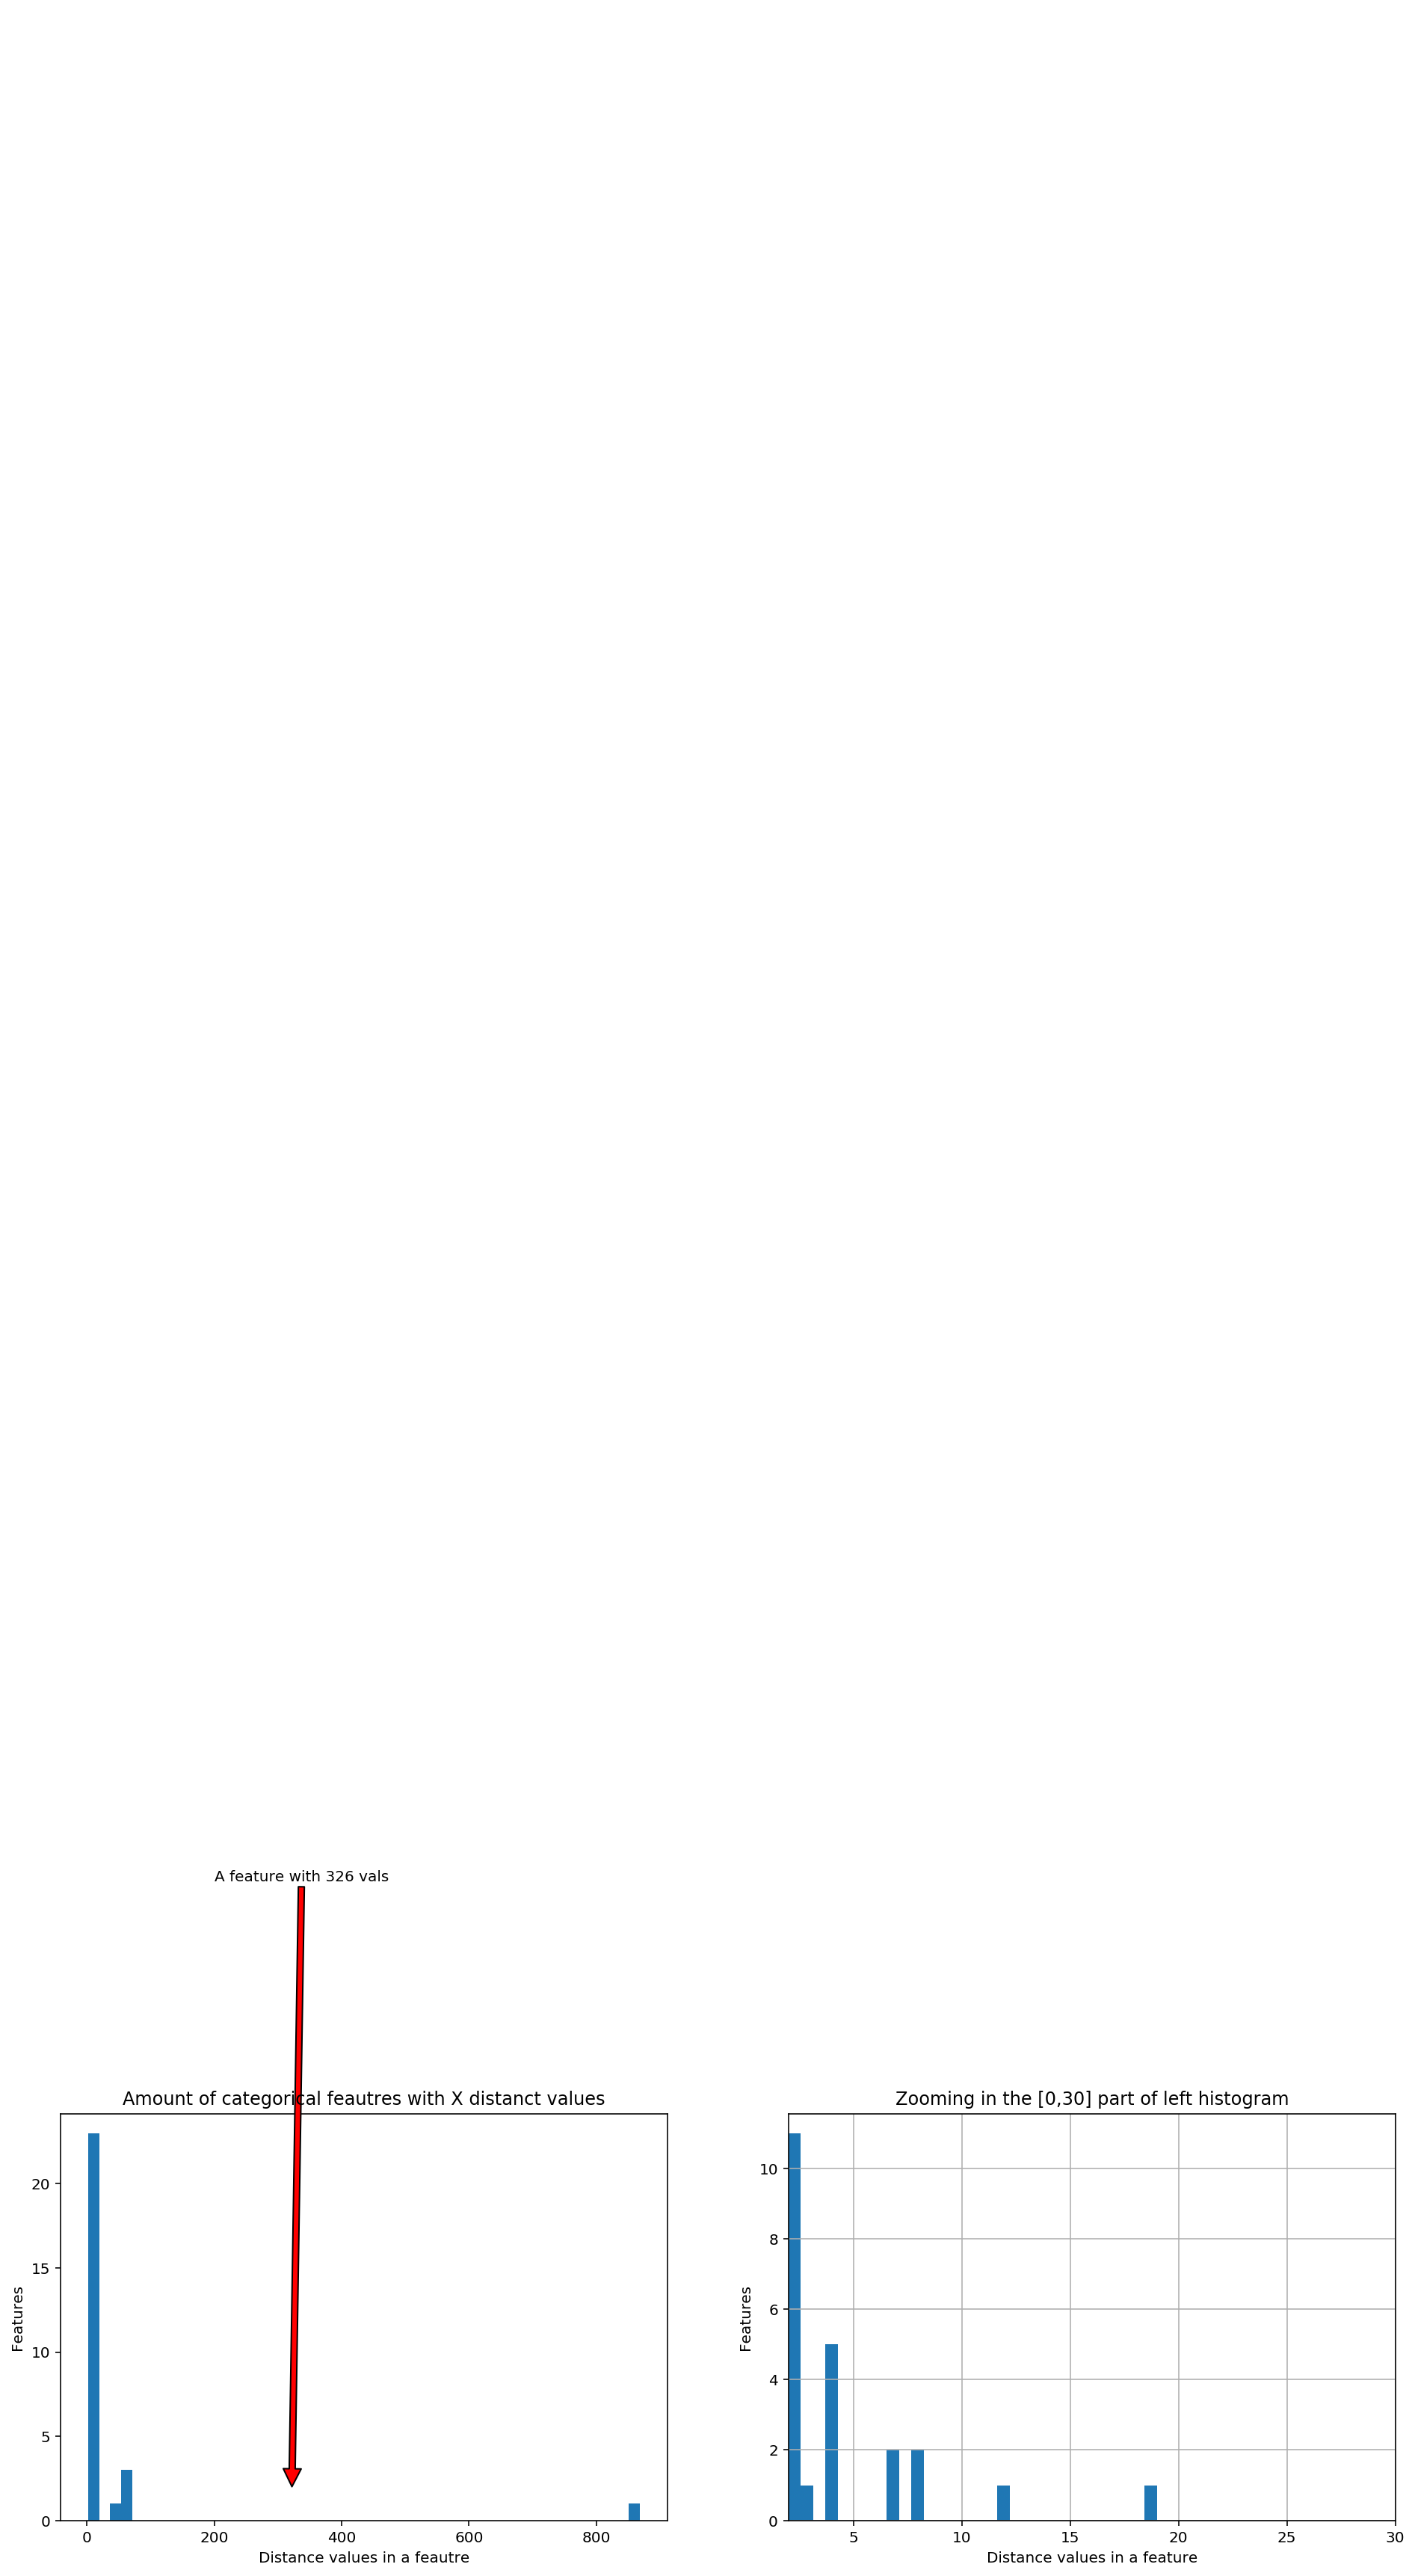

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(uniq_values_in_categories.cat_values,bins = 50)
ax1.set_title('Amount of categorical feautres with X distanct values')
ax1.set_xlabel('Distance values in a feautre')
ax1.set_ylabel('Features')
ax1.annotate('A feature with 326 vals',xy = (322,2),xytext = (200,38),
           arrowprops = dict(facecolor = 'red'))

ax2.set_xlim(2,30)
ax2.set_title('Zooming in the [0,30] part of left histogram')
ax2.set_xlabel('Distance values in a feature')
ax2.set_ylabel('Features')
ax2.grid(True)
ax2.hist(uniq_values_in_categories[uniq_values_in_categories.cat_values <= 30].cat_values,
        bins = 30)
ax2.annotate('Binary features',xy = (3,71),xytext = (7,71),
             arrowprops = dict(facecolor = 'red'))

# 赔偿率

In [23]:
train.columns[:5]

Index(['QuoteNumber', 'QuoteConversion_Flag', 'Field7', 'Field8', 'Field9'], dtype='object')

No handles with labels found to put in legend.


<Figure size 1008x720 with 0 Axes>

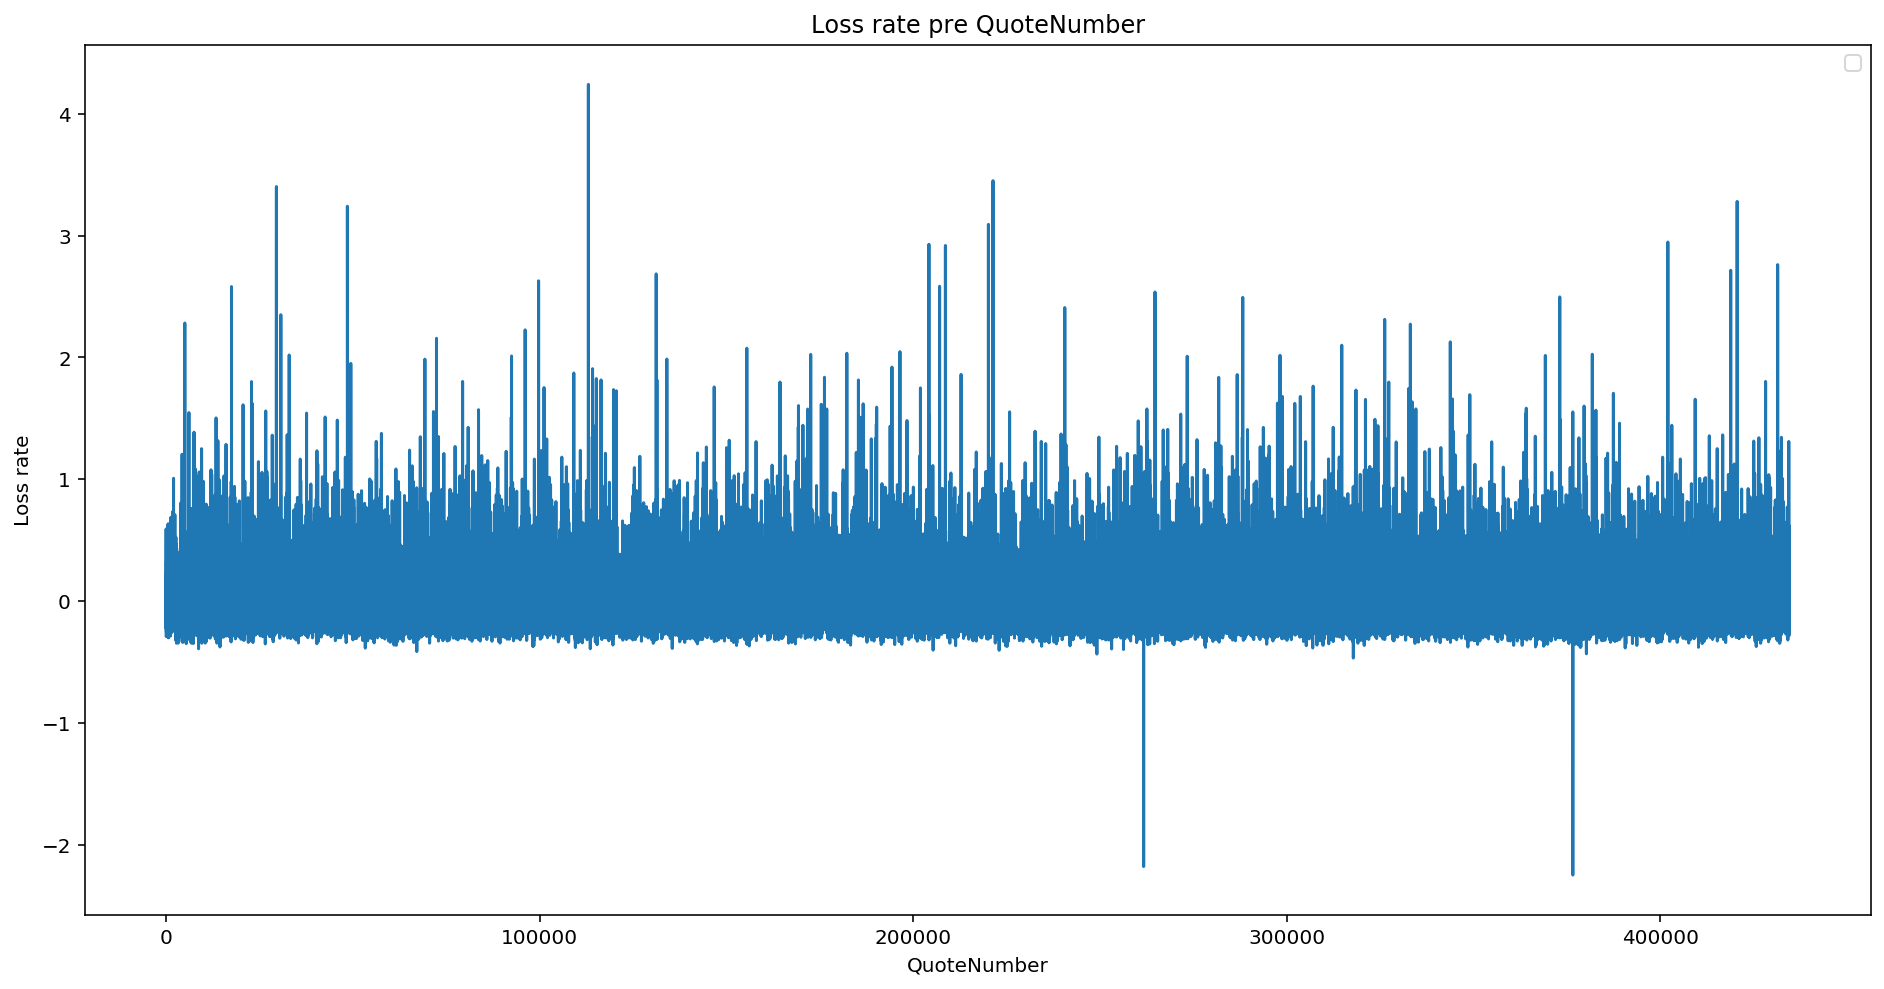

In [58]:
fig = plt.figure(figsize = (14,10))
plt.figure(figsize=(16,8))
plt.plot(train['QuoteNumber'],train['Col_mean'])
plt.title('Loss rate pre QuoteNumber')
plt.xlabel('QuoteNumber')
plt.ylabel('Loss rate')
plt.legend()
plt.show()

# 损失值中有几个显著的峰值表示严重的事故，这样的数据分布，使得这个功能非常的扭曲导致的回归表现不佳。
基本上，偏度度量了实值随机变量的均值分布的不对称性。让我们计算损失的偏度：
#数据越倾斜，越不利于建模，越均匀，越有利于建模

# from scipy import stats
导入这个库可以计算当前的数据的某一列的偏度值

In [8]:
# 比1 大，就是倾斜的
stats.mstats.skew(train['Col_mean']).data

array(2.59915183)

# 对数据进行对数变换可以改善倾斜程度，可以使用np.log

In [9]:
stats.mstats.skew(np.log(train['Col_mean'])).data

d:\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array(0)

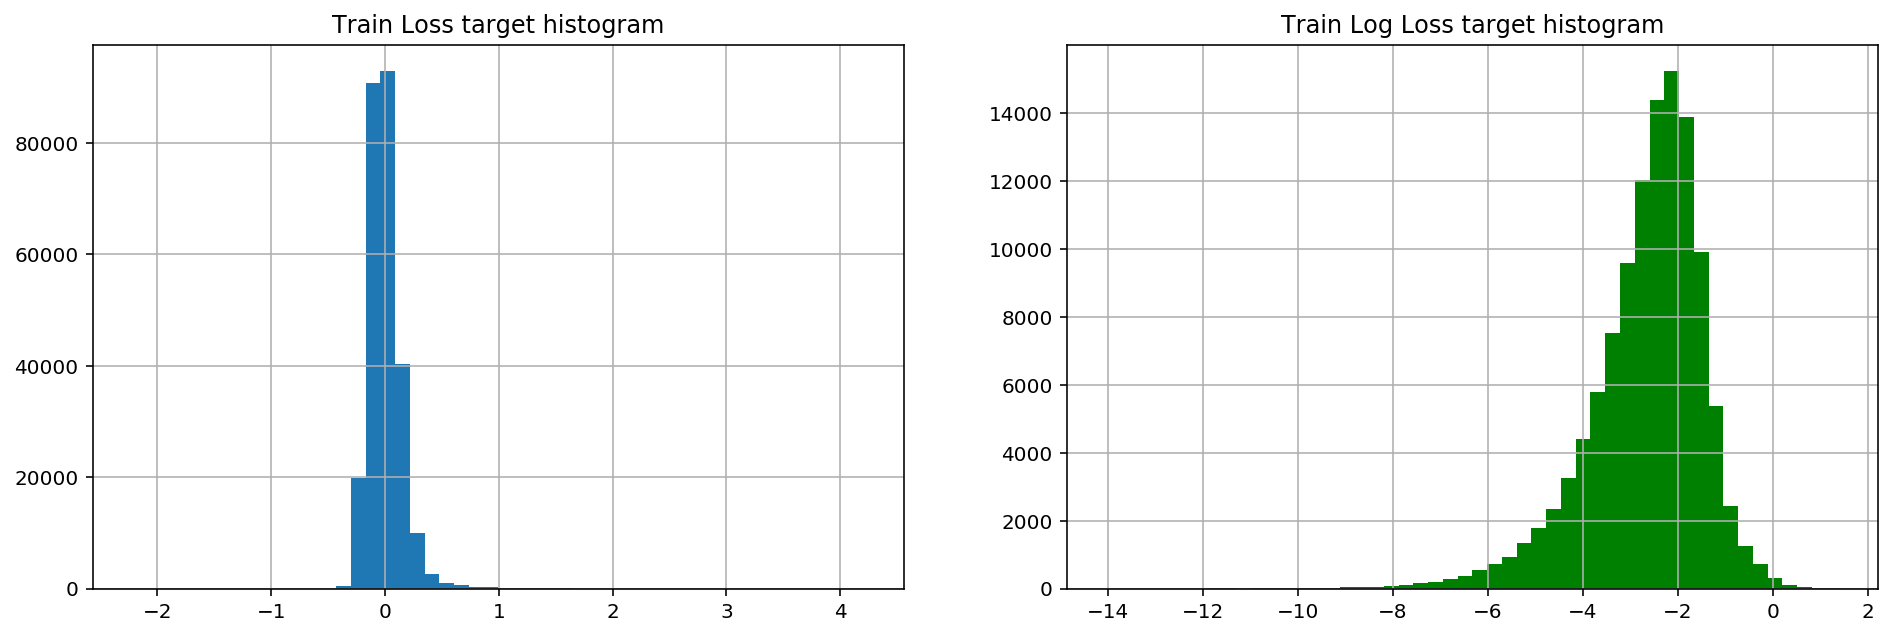

In [28]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['Col_mean'],bins = 50)
ax1.set_title('Train Loss target histogram')
ax1.grid(True)
ax2.hist(np.log(train['Col_mean']),bins = 50,color = 'g')
ax2.set_title('Train Log Loss target histogram')
ax2.grid(True)
plt.show()

# 连续值特征

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002624553F160>,
      dtype=object)

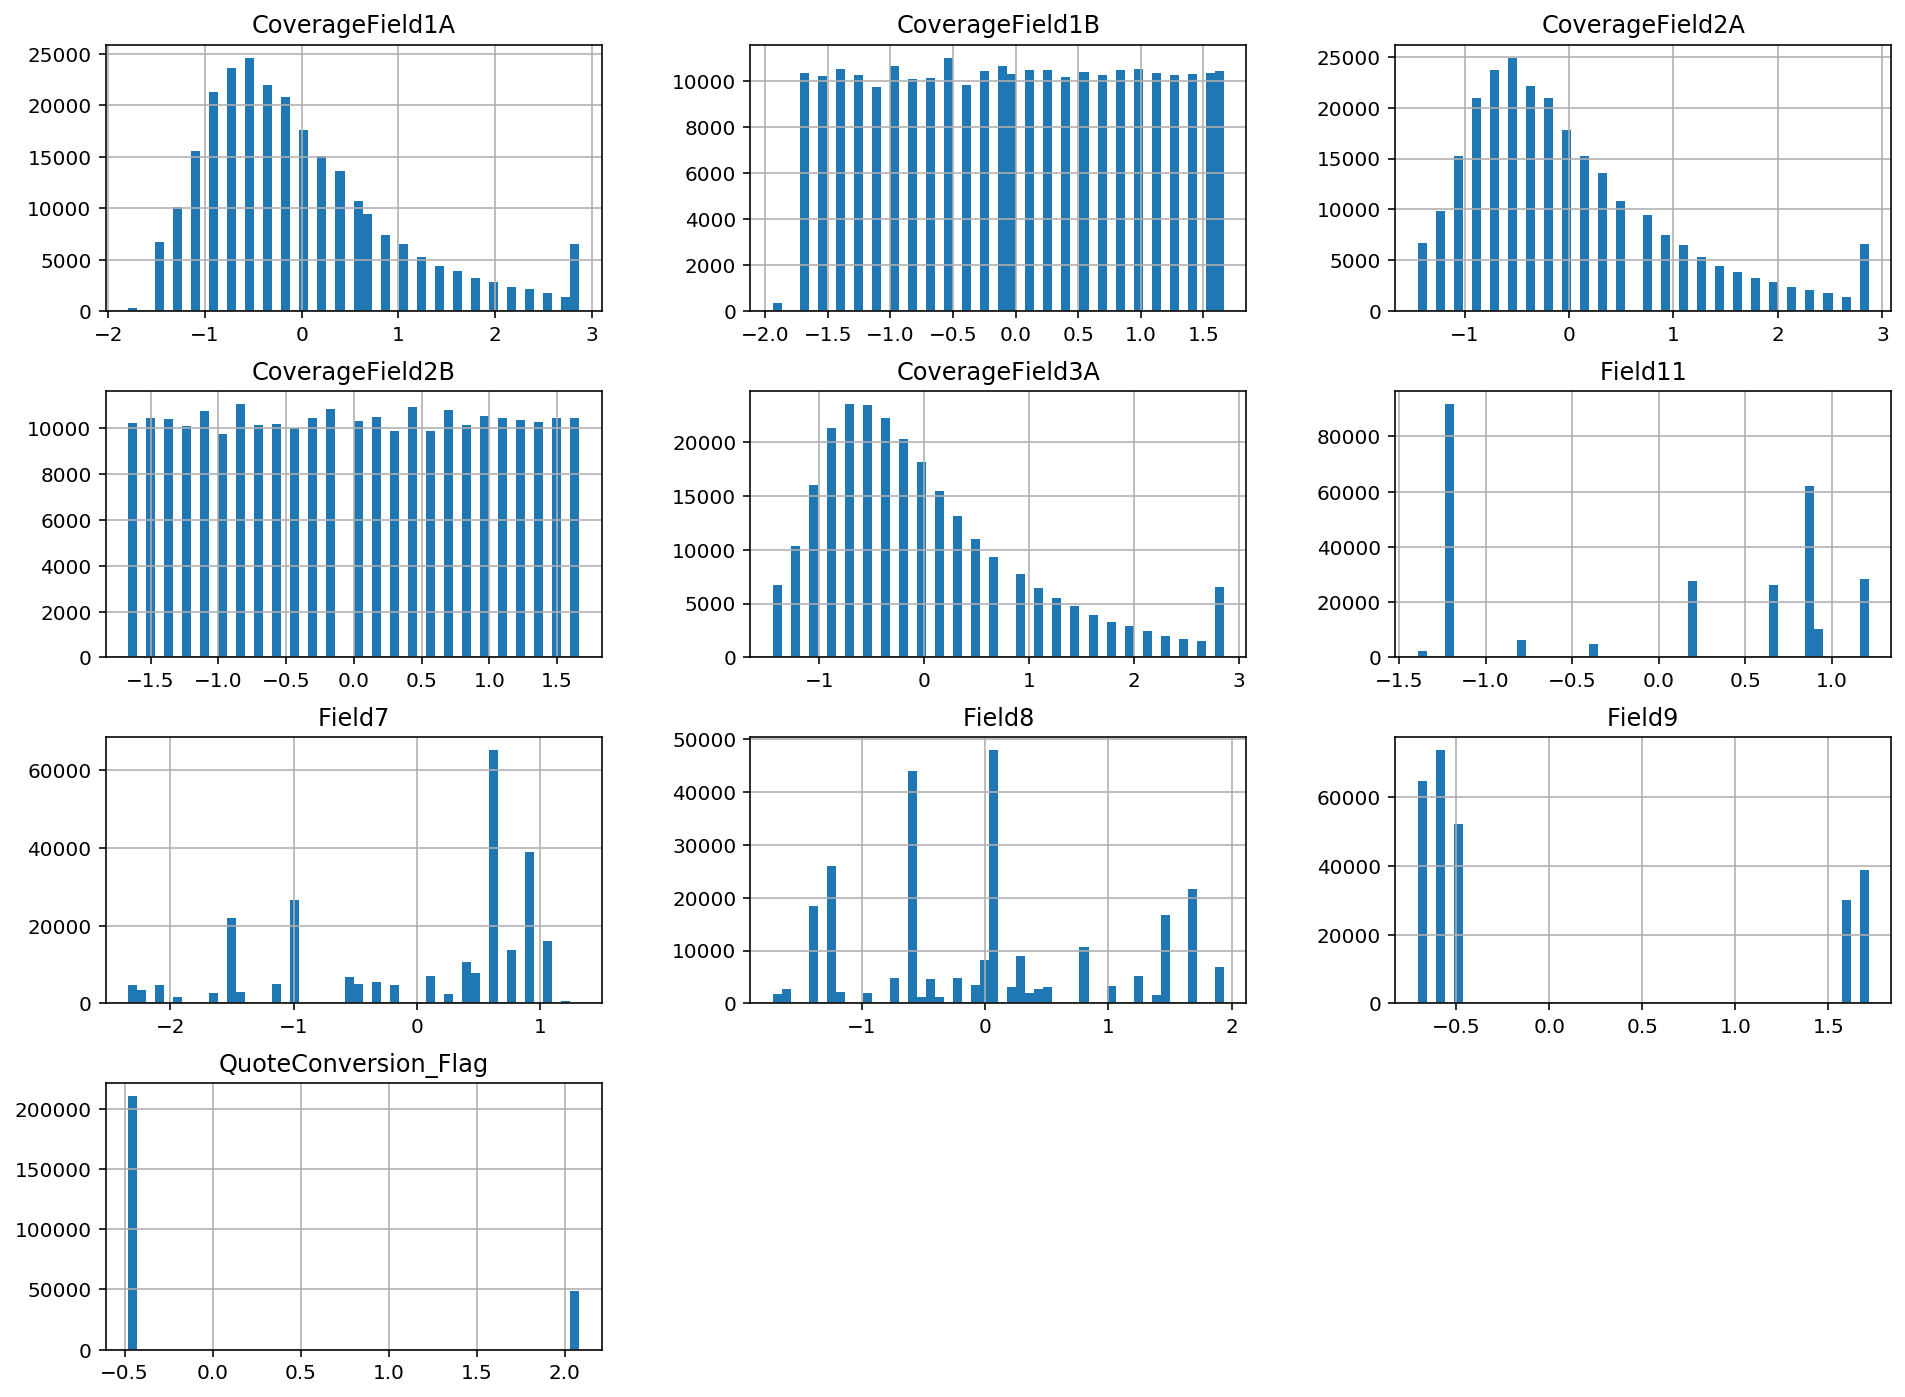

In [67]:
# 因为连续值有269个太多了只是选取前10个
cont_features1 = cont_features[:10]
train[cont_features1].hist(bins=50,figsize=(16,12))

# 特征之间的相关性: 删选相似度较高的，不利于我们分析，贡献性

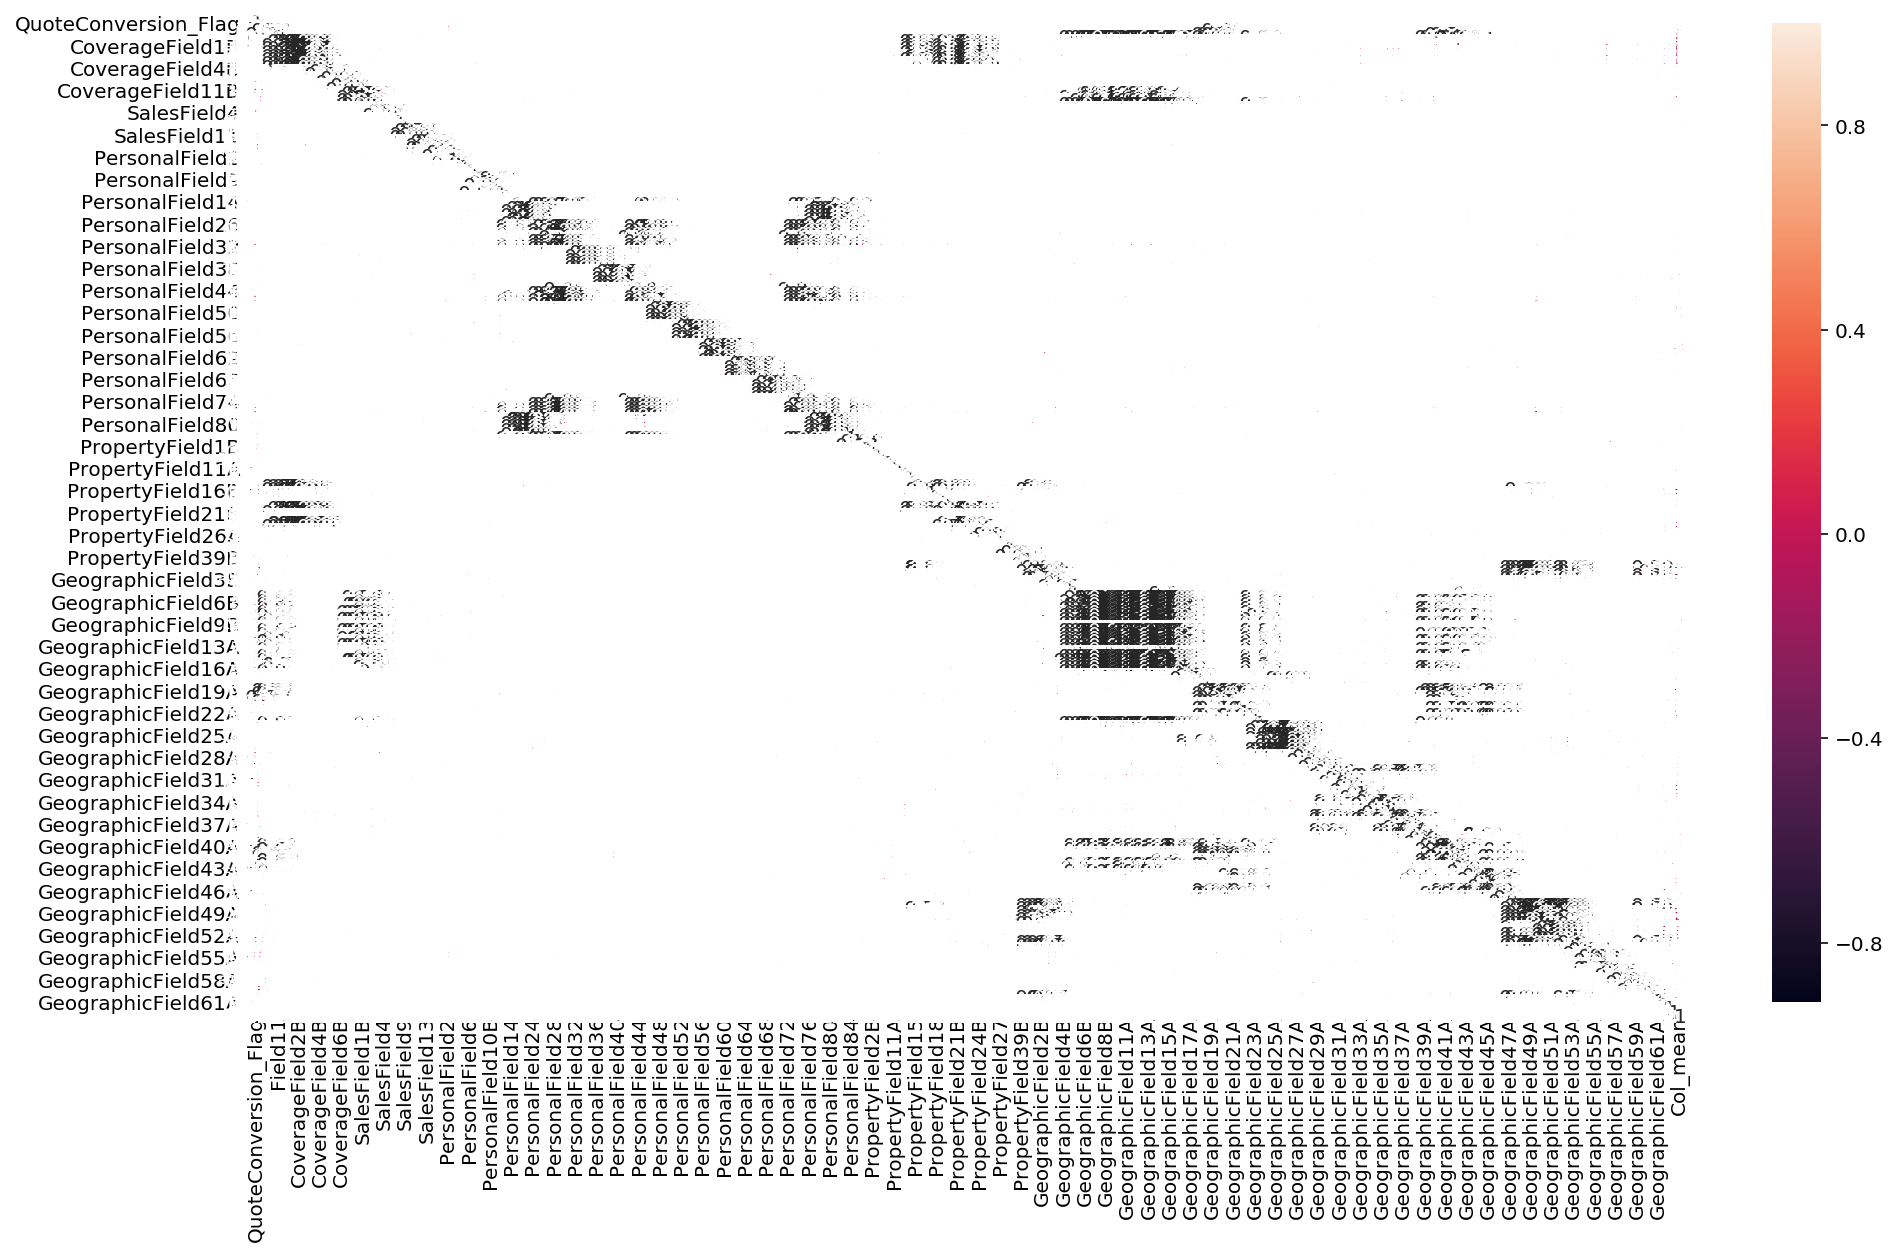

In [70]:
# 特征太多了，269个
plt.subplots(figsize=(16,9))
correlation_mat = train[cont_features].corr()
sns.heatmap(correlation_mat,annot = True)

# XgBoost调参策略

In [10]:
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 数据预处理

In [11]:
train['log_loss'] = np.log(train['Col_mean'])

# 数据分成连续和离散特征

In [12]:
features = [x for x in train.columns if x not in ['QuoteNumber','Col_mean','log_loss']]

cat_features = [x for x in train.select_dtypes(
include=['object']).columns if x not in ['QuoteNumber','Col_mean','log_loss']]

num_features = [x for x in train.select_dtypes(
include=['float']).columns if x not in ['QuoteNumber','Col_mean','log_loss']]

print('Categorical features:',len(cat_features))
print('Numberical features:',len(num_features))

Categorical features: 28
Numberical features: 268


In [13]:
ntrain = train.shape[0]

train_x = train[features]
train_y = train['log_loss']

for c in range(len(cat_features)):
    train_x[cat_features[c]] = train_x[cat_features[c]].astype('category').cat.codes
    
print('Xtrain:',train_x.shape)
print('ytrain:',train_y.shape)

Xtrain: (259499, 296)
ytrain: (259499,)


# XGBoost 参数

1.eta [default=0.3, alias: learning_rate]
学习率，可以缩减每一步的权重值，使得模型更加健壮： 典型值一般设置为：0.01-0.2

2. min_child_weight [default=1]
一个子集的所有观察值的最小权重和。如果新分裂的节点的样本权重和小于min_child_weight则停止分裂 。这个可以用来减少过拟合，但是也不能太高，会导致欠拟合。

3. max_depth [default=6]
树的最大深度，值越大，树越大，模型越复杂 可以用来防止过拟合，典型值是3-10。

4. gamma [default=0, alias: min_split_loss]
分裂节点时，损失函数减小值只有大于等于gamma节点才分裂，gamma值越大，算法越保守，越不容易过拟合，但性能就不一定能保证，需要平衡。

5. subsample [default=1]
构建每棵树对样本的采样率，如果设置成0.5，XGBoost会随机选择一半的样本作为训练集。

6. colsample_bytree [default=1]
列采样率，也就是特征采样率。

7. colsample_bylevel [default=1]
构建每一层时，列采样率。

8. lambda [default=1, alias: reg_lambda]
L2正则化，这个参数是用来控制XGBoost的正则化部分的。虽然大部分数据科学家很少用到这个参数，但是这个参数在减少过拟合上还是可以挖掘出更多用处的。

9. alpha [default=0, alias: reg_alpha]
L1正则化，增加该值会让模型更加收敛

10. scale_pos_weight, [default=1]
在类别高度不平衡的情况下，将参数设置大于0，可以加快收敛。


- booster:gbtree
- objective: 
    - (默认)reg:linear：线性回归
    - reg:logistic：逻辑回归
    - binary:logistic 二分类的逻辑回归，返回预测的概率
    - binary:logitraw：二分类逻辑回归，输出是逻辑为0/1的前一步的分数
    - multi:softmax：用于Xgboost 做多分类问题，需要设置num_class（分类的个数） 
    - multi:softprob：和softmax一样，但是返回的是每个数据属于各个类别的概率。
    - rank:pairwise：让Xgboost 做排名任务，通过最小化(Learn to rank的一种方法)
- slient:0设置为1，代表没有运行信息输出，最好为0
- min_child_weight:3,孩子节点中最小的样本权重和。如果一个叶子节点样本权重和小于min_child_weight则拆分过程结束
-  eta:学习率，上面有介绍
- subsample:0.7,随机采样训练样本
- colsample:0.7生成树时进行的列采样
- seed:1000
- nthread:7,cpu线程数
    
 2、eval_metric（ 默认值取决于objective参数的取值）

- 对于有效数据的度量方法。

- 对于回归问题，默认值是rmse，对于分类问题，默认值是error。

# 典型值有：

- rmse 均方根误差

- mae 平均绝对误差

- logloss 负对数似然函数值

- error 二分类错误率(阈值为0.5)

- merror 多分类错误率

- mlogloss 多分类logloss损失函数

- auc 曲线下面积

# 参数调优的一般步骤

1. 确定学习速率和提升参数调优的初始值

2. max_depth 和 min_child_weight 参数调优

3. gamma参数调优

4. subsample 和 colsample_bytree 参数优

5. 正则化参数alpha调优

6. 降低学习速率和使用更多的决策树

# 删除Nan的数据，之后应该isfinite,无穷数也就没有了

In [14]:
#  np.nan() 用来判断是否含有Nan值，存在则返回true
np.isnan(train['log_loss']).any()

True

In [15]:
# 删除为Nan 的数据,并且想要直接影响DataFrame本身，如果不加inplace = True的话，train数据集中依旧有Nan值
train.dropna(inplace = True)

In [16]:
np.isnan(train['log_loss']).any()

False

In [17]:
# isfinite（） 查看是否含有无穷值，返回FALSE代表存在无穷值
print(np.isfinite(train['log_loss']).all())

True


In [18]:
print(np.isfinite(train_x).all())

QuoteConversion_Flag    True
Field7                  True
Field8                  True
Field9                  True
Field11                 True
CoverageField1A         True
CoverageField1B         True
CoverageField2A         True
CoverageField2B         True
CoverageField3A         True
CoverageField3B         True
CoverageField4A         True
CoverageField4B         True
CoverageField5A         True
CoverageField5B         True
CoverageField6A         True
CoverageField6B         True
CoverageField11A        True
CoverageField11B        True
SalesField1A            True
SalesField1B            True
SalesField2A            True
SalesField2B            True
SalesField3             True
SalesField4             True
SalesField5             True
SalesField6             True
SalesField8             True
SalesField9             True
SalesField10            True
                        ... 
GeographicField62A      True
GeographicField62B      True
Original_Quote_Date     True
Field6        

In [19]:
np.isnan(train_x).any()

QuoteConversion_Flag    False
Field7                  False
Field8                  False
Field9                  False
Field11                 False
CoverageField1A         False
CoverageField1B         False
CoverageField2A         False
CoverageField2B         False
CoverageField3A         False
CoverageField3B         False
CoverageField4A         False
CoverageField4B         False
CoverageField5A         False
CoverageField5B         False
CoverageField6A         False
CoverageField6B         False
CoverageField11A        False
CoverageField11B        False
SalesField1A            False
SalesField1B            False
SalesField2A            False
SalesField2B            False
SalesField3             False
SalesField4             False
SalesField5             False
SalesField6             False
SalesField8             False
SalesField9             False
SalesField10            False
                        ...  
GeographicField62A      False
GeographicField62B      False
Original_Q

# Simple XGBoost Model
- 首先，我们先训练一个基本的xgboost模型，然后进行参数调节通过交叉验证观察结果的变换，使用平均值对绝对误差来衡量
- mean_absolute_error(np.exp(y),np.exp(yhat))
- xgboost 自定义了一个数据矩阵类DMatrix,会在训练开始时进行一遍预处理，从而提高之后每次迭代的效率

In [20]:
train.to_csv('./data/csv/Homesite_Quote_Conversion/last_train/NOnan_train.csv')

In [39]:
# 评估方法,评估策略
def xg_eval_mae(yhat,dtrain):
    y = dtrain.get_label()
    return 'mae',mean_absolute_error(np.exp(y),np.exp(yhat))

# Model

In [40]:
# 转换数据格式，转换成xgboost 底层所支持的格式
dtrain = xgb.DMatrix(train_x,train['log_loss'])

In [41]:
# 先随机的设置一组参数值
xgb_params = {
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.5,
    'slient':1,
    'subsample':0.5,
    'objective':'reg:linear',
    'max_depth':5,
    'min_child_weight':3
}

使用交叉验证xgb.cv

In [42]:
%%time
from xgboost import cv

bst_cv1 = xgb.cv(xgb_params,dtrain,num_boost_round = 50,nfold = 3,seed = 0,
                 feval = xg_eval_mae,maximize = False,early_stopping_rounds = 10)

print('CV score:',bst_cv1.iloc[-1,:]['test-mae-mean'])

OSError: exception: access violation reading 0x00000138F31B5244

In [120]:
plt.figure()
bst_cv1[['train-mae-mean','test-mae-mean']].plot()

Exception ignored in: <function DMatrix.__del__ at 0x00000262CDD31488>
Traceback (most recent call last):
  File "d:\python37\lib\site-packages\xgboost\core.py", line 531, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
  File "d:\python37\lib\site-packages\xgboost\core.py", line 176, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:13:16] C:\Jenkins\workspace\xgboost-win64_release_0.90\src\c_api\c_api.cc:734: DMatrix/Booster has not been intialized or has already been disposed.


NameError: name 'bst_cv1' is not defined

<Figure size 432x288 with 0 Axes>

# 建立第一个基础模型：没有发生过拟合，只建立50个树模型

In [97]:
object_features = list(train.select_dtypes(include = ['object']).columns)
train = train.drop(object_features,axis=1)

In [100]:
train.to_csv('./data/csv/Homesite_Quote_Conversion/last_train/loss_train.csv',index=False)

In [91]:
# 将数据集删除掉时间的列
# train = train.drop('Original_Quote_Date',axis=1)

In [2]:
import xgboost as xgb
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
boston = load_boston()
#查看波士顿数据集的keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [8]:
boston_data=boston.data
target_var=boston.target
feature=boston.feature_names

boston_df=pd.DataFrame(boston_data,columns=boston.feature_names)
boston_df['tar_name']=target_var

#查看目标变量描述统计
print(boston_df['tar_name'].describe())
#把数据集转变为二分类数据
boston_df.loc[boston_df['tar_name']<=21,'tar_name']=0
boston_df.loc[boston_df['tar_name']>21,'tar_name']=1


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: tar_name, dtype: float64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(boston_df[feature], boston_df['tar_name'], test_size=0.30, random_state=1)

train_data=xgb.DMatrix(x_train,label=y_train)
dtrain=xgb.DMatrix(x_train)
dtest=xgb.DMatrix(x_test)


d:\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [10]:

params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':6,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'eta': 0.03,}

In [11]:

watchlist = [(train_data,'train')]
bst=xgb.train(params,train_data,num_boost_round=100,evals=watchlist)

[0]	train-auc:0.943585
[1]	train-auc:0.973502
[2]	train-auc:0.976361
[3]	train-auc:0.984315
[4]	train-auc:0.984842
[5]	train-auc:0.986695
[6]	train-auc:0.987222
[7]	train-auc:0.987414
[8]	train-auc:0.987797
[9]	train-auc:0.989426
[10]	train-auc:0.990832
[11]	train-auc:0.99195
[12]	train-auc:0.992397
[13]	train-auc:0.992301
[14]	train-auc:0.993132
[15]	train-auc:0.993164
[16]	train-auc:0.993324
[17]	train-auc:0.993803
[18]	train-auc:0.994314
[19]	train-auc:0.994537
[20]	train-auc:0.994889
[21]	train-auc:0.995049
[22]	train-auc:0.994569
[23]	train-auc:0.995144
[24]	train-auc:0.995432
[25]	train-auc:0.995943
[26]	train-auc:0.996103
[27]	train-auc:0.996199
[28]	train-auc:0.996071
[29]	train-auc:0.996199
[30]	train-auc:0.996167
[31]	train-auc:0.996518
[32]	train-auc:0.996422
[33]	train-auc:0.996454
[34]	train-auc:0.996422
[35]	train-auc:0.99639
[36]	train-auc:0.996422
[37]	train-auc:0.996358
[38]	train-auc:0.996646
[39]	train-auc:0.996774
[40]	train-auc:0.99671
[41]	train-auc:0.996837
[42]	

In [12]:
# 度量xgboost的准确性
y_train_pred = (bst.predict(dtrain)>=0.5)*1
y_test_pred =(bst.predict(dtest)>=0.5)*1
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('xgboost train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

xgboost train/test accuracies 0.986/0.875
